In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 2s 1us/step


num_words = 는 자주 등장하는 단어 10000개로 제한함

In [27]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [48]:
len(train_data[2])

139

In [25]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [28]:
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [26]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 데이터를 벡터로 인코딩하기

In [53]:
import numpy as np

def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize(train_data)
x_test = vectorize(test_data)

train_data를 enumerate 하면 i, sequence 에서 sequence에는 뭐가 들어감? 원소가 있는건 알겠는데아아아 저 정수 숫자구나
아 그래서 저 행, 정수숫자 부분에 가서 1.로 채우는거구나

## 레이블을 벡터로 인코딩하기

In [60]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i , label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
ont_hot_test_labels = to_one_hot(test_labels)

얘는 train_data랑 test_data가 넘파이배열이라 to_categorical함수를 못씀.
# to_categorical 은 걍 one hot encoding 해주던데;

## 모델 구성

In [62]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation='softmax'))

마지막 층에 46은 각 입력 샘플에 대해 46차원 벡터 출력(각기 다른 출력 클래스가 인코딩댐. 46클래스인듯)
마지막 softmax - 확률 분포 출력
# softmax : 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화. 출력 값들의 총합은 항상 1
output[i]는 어떤 샘플이 클래스 i에 속할 확률 출력

# 모델 컴파일 가보자고

In [63]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# 모델 훈련 가보자고

In [64]:
#검증 세트 떼어내기
x_val = x_train[:1000]
part_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
part_y_train = one_hot_train_labels[1000:]

In [65]:
history = model.fit(part_x_train, part_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 47ms/step - loss: 2.6671 - accuracy: 0.5064 - val_loss: 1.8124 - val_accuracy: 0.6120
Epoch 2/20
16/16 [==============================] - 1s 33ms/step - loss: 1.5148 - accuracy: 0.6877 - val_loss: 1.3520 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.1486 - accuracy: 0.7582 - val_loss: 1.1719 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 1s 32ms/step - loss: 0.9334 - accuracy: 0.8027 - val_loss: 1.0606 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 1s 34ms/step - loss: 0.7715 - accuracy: 0.8314 - val_loss: 0.9898 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.6410 - accuracy: 0.8612 - val_loss: 0.9484 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5384 - accuracy: 0.8842 - val_loss: 0.9131 - val_accuracy: 0.8010
Epoch 8/20
16

# fit()에는 train데이터랑 train라벨 일부 떼어낸게 들어감.(train할것들)
validation_data에는 검증에 사용할 떼어낸 검증용 데이터, 라벨이 들어감.(train빼고 남겨둔 뒤의것들로 검증)


# 그래프 가보자고

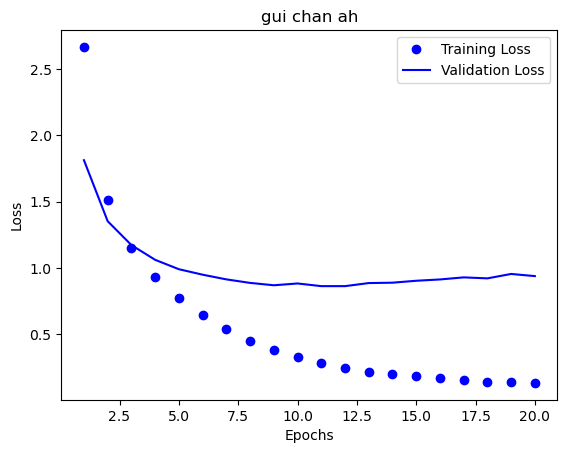

In [75]:
import matplotlib.pyplot as plt

loss = history.history['loss']  #history.history 는 딕셔너리구나. loss는 각 epoch(20회) 마다 loss를 원소로 가진 배열
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('gui chan ah')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [77]:
loss

[2.667090892791748,
 1.5148169994354248,
 1.1485568284988403,
 0.9333644509315491,
 0.7714802622795105,
 0.640995979309082,
 0.5384324789047241,
 0.44937828183174133,
 0.3812711238861084,
 0.3246452510356903,
 0.28346771001815796,
 0.24766112864017487,
 0.21669775247573853,
 0.20168538391590118,
 0.18287022411823273,
 0.1653461903333664,
 0.15597741305828094,
 0.1424853503704071,
 0.1409369260072708,
 0.13178910315036774]

# 오늘의 결론

* N개의 클래스로 분류할 때 마지막 Dense 층 크기 N
* 확률 분포 출력시 softmax
* 이런 문제는 항상 범주형(categorical) crossentropy